# Media movil simple (SMA)

La **media móvil simple (SMA)** es una herramienta de análisis técnico usada en trading para suavizar las fluctuaciones de los precios y así identificar tendencias más claramente y probablemente una de las más comunes para detectar las tendencias del mercado.

### ¿Para qué sirve?
* **Identificar tendencias**: Si la SMA sube, hay una tendencia alcista. Si baja, hay una tendencia bajista.
* **Generar señales de compra o venta**:
    * **Compra**: Cuando el precio cruza la SMA de 50 periodos cruza hacia arriba la SMA de 200 periodos.
    * **Venta**: Cuando el precio cruza la SMA de 50 periodos cruza hacia abajo la SMA de 200 periodos. 

### Fórmula de la SMA


$$ \text{SMA} = \frac{P_1 + P_2 + P_3 + \ldots + P_n}{n} $$

Donde:

* $P1,P2,P3,...,Pn$ son los precios de cierre de los últimos 𝑛 periodos.
* $n$ es el número total de periodos que estás considerando.


<span style="color:white; background-color:red; padding:2px;"><strong>Disclaimer:</strong> Este material no constituye un consejo de inversión. Es únicamente para fines educativos.</span>



Ahora veremos su desarrollo usando Python. 


### Importamos librerias

In [53]:
import yfinance as yf # para extraer datos financieros de Yahoo.

import pandas as pd # Para la manipulación de datos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.

import warnings  # Para gestionar los mensajes de advertencia.
warnings.filterwarnings('ignore')


### Establecemos apariencia general de los gráficos

In [54]:
%matplotlib inline 
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize']=(20,8)

1. Empezamos descargando los datos de Yahoo Finance `yf`, en este ejemplo usaremos los datos de Apple.

In [55]:
ticket = 'AAPL'
data = yf.download(ticket, start='2015-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402176,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716955,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973555,237458000


2. Damos un vistazo a los datos, en este caso usaremos el precio de cierre ajustado, pero también se puede usar el precio de cierre.


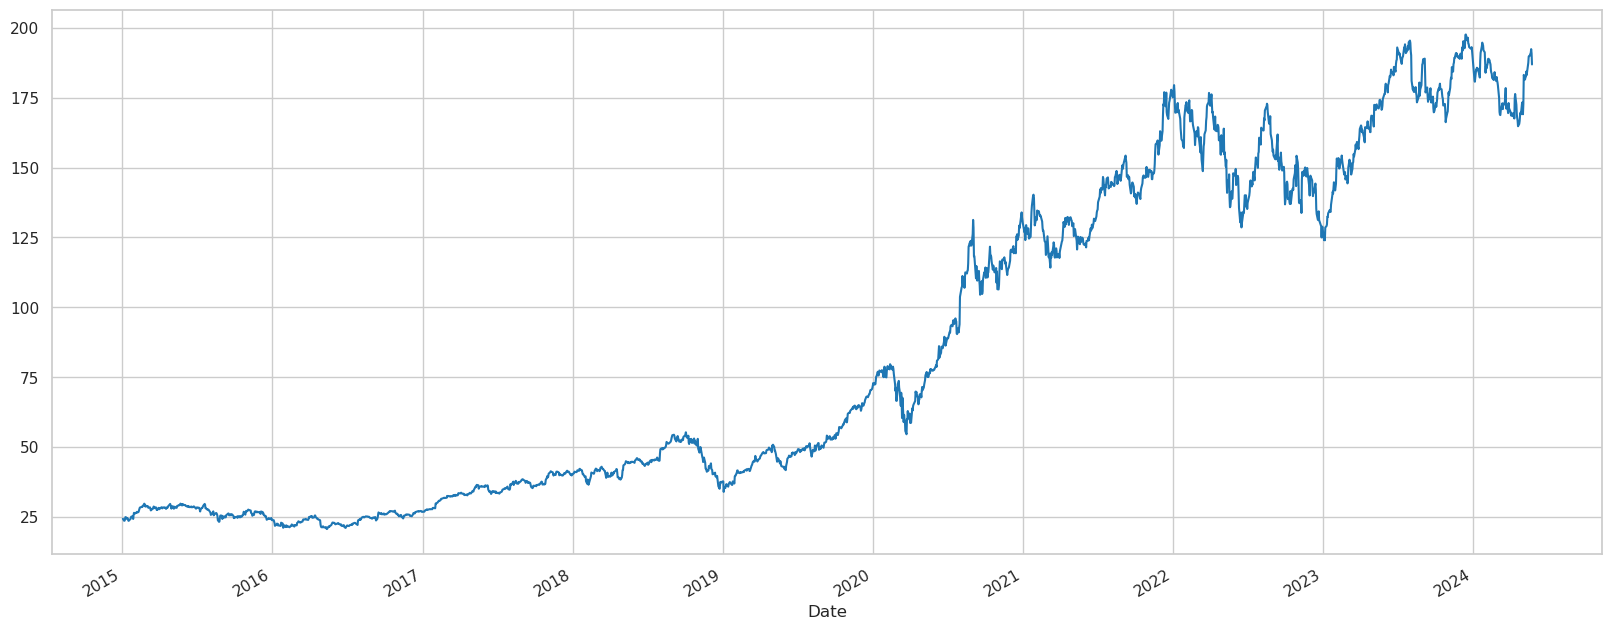

In [56]:
data['Adj Close'].plot();

3. Creamos una función `SMA` que recibe un DataFrame y una lista de ventanas temporales y devuelve el DataFrame con las medias móviles simples calculadas en una nueva columna. La función `rolling` de Pandas nos permite calcular la media móvil simple de una serie temporal.

In [57]:
def SMA(df, *windows):
    for window in windows:
        sma = pd.Series(
            pd.Series.
            rolling(
                df['Adj Close'], window)
                .mean(), 
                name='SMA_' + str(window)
            )
        df = df.join(sma)

    
    return df

4. Calcular la media móvil simple de 50 y 200 días, y vemos dos nuevas conlumnas con las medias móviles de 50 y 200 periodos. 


In [58]:
sma_50_200 = SMA(data,50,200)
sma_50_200


,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200
Date,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402176,212818400,NaN,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000,NaN,NaN
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716955,263188400,NaN,NaN
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600,NaN,NaN
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973555,237458000,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900,173.905672,180.298212
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300,174.316497,180.302611
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400,174.713177,180.359218


5. Creamos una funcion para poder graficar, en esta ocación usaremos Matplotlib. Esta función se encarga de iterar cada SMA. 

In [59]:
def plot_data_SMA(df):
    
    sma_periods = ', '.join([column.split('_')[-1] for column in df.columns if 'SMA' in column])
    plt.plot(df['Adj Close'], label='Adj Close')


    plt.title(f'Simple Moving Average of {ticket} {sma_periods}')

    sma_columns = [col for col in df.columns if 'SMA' in col]

    for column in sma_columns:
        plt.plot(df[column], label=column)
    plt.legend()
    plt.show()

6. Por ultimo, llamamos a la función y graficamos y bingo 😎, tenemos la SMA para AAPL de 50 y 200 periodos de una manera sencilla, claro se puede mejorar y hacer mucho mas robusto el código, de acuerdo a las necesidades. 

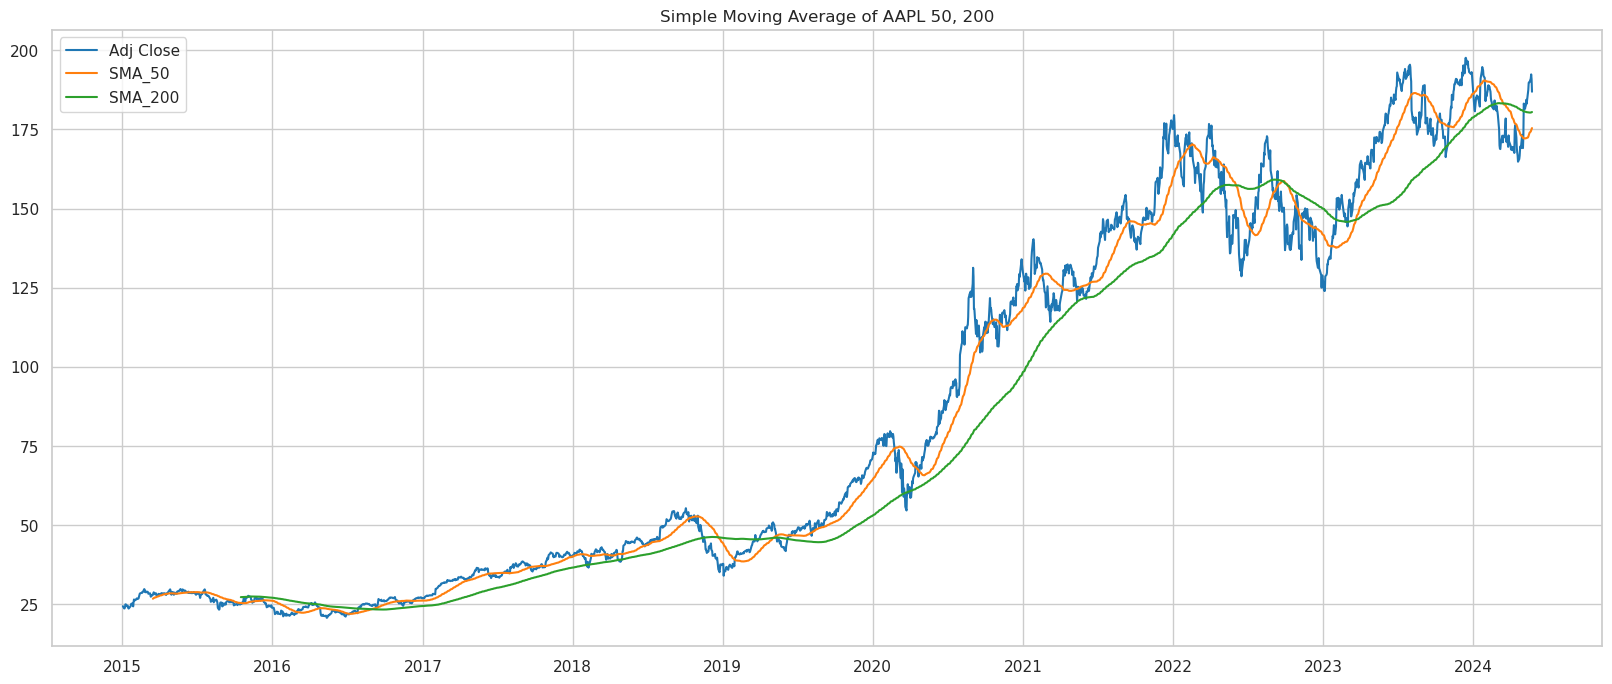

In [60]:
plot_data_SMA(sma_50_200)

# Media Móvil Exponencial (EMA)
La Media Móvil Exponencial (EMA) es una herramienta de análisis técnico usada en trading que da más peso a los datos recientes, haciendo que responda más rápidamente a los cambios en los precios que la Media Móvil Simple (SMA).

> 👀 Tiene la misma funcionalidad que la SMA

### Fórmula de la EMA:
La fórmula de la EMA se calcula en dos pasos principales:

1. **Calcular el factor de suavizado ($\alpha $)**:
   $$
   \alpha = \frac{2}{n + 1}
   $$
   * Donde \( $n$ \) es el número de periodos.

2. **Calcular la EMA**:
   $$
   \text{EMA}_t = \alpha \times P_t + (1 - \alpha) \times \text{EMA}_{t-1}
   $$
   Donde:
   - $\text{EMA}_t $ es la EMA del día actual.
   - $( P_t )$ es el precio de cierre del día actual.
   - $( \text{EMA}_{t-1} )$ es la EMA del día anterior.

1. En esta ocasión, creamos una función de nombre `EMA`, y usaremos la funcion `ewm` que calcula estadísticas exponencialmente ponderadas. 

In [61]:
def EMA(df, *windows):
    for window in windows:
        ema = pd.Series(
            pd.Series.
            ewm(
                df['Adj Close'], window)
                .mean(), 
                name='EMA_' + str(window)
            )
        df = df.join(ema)

    
    return df

2. Verificamos si se crearon las columnas EMA_50 y EMA_100 y EMA_200

In [62]:
exponencial = EMA(data,50,100,200)
exponencial.head()

,Open,High,Low,Close,Adj Close,Volume,EMA_50,EMA_100,EMA_200
Date,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402176,212818400,24.402176,24.402176,24.402176
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000,24.055047,24.056741,24.057594
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716955,263188400,23.940111,23.942350,23.943481
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600,23.968280,23.969543,23.970188
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973555,237458000,24.177376,24.174361,24.172868


3. Creamos una función para graficar la EMA 😋

In [63]:
def plot_data_EMA(df):
    sma_periods = ', '.join([column.split('_')[-1] for column in df.columns if 'EMA' in column])
    plt.plot(df['Adj Close'], label='Price')


    plt.title(f'Exponential Moving Average of {ticket} {sma_periods}')

    ema_columns = [col for col in df.columns if 'EMA' in col]

    for column in ema_columns:
        plt.plot(df[column], label=column)
    plt.legend()
    plt.show()

4. Llamamos a la función y listo, tenemos la gráfica EMA de 50 y 100 periodos para `AAPL`, de una manera sencilla.

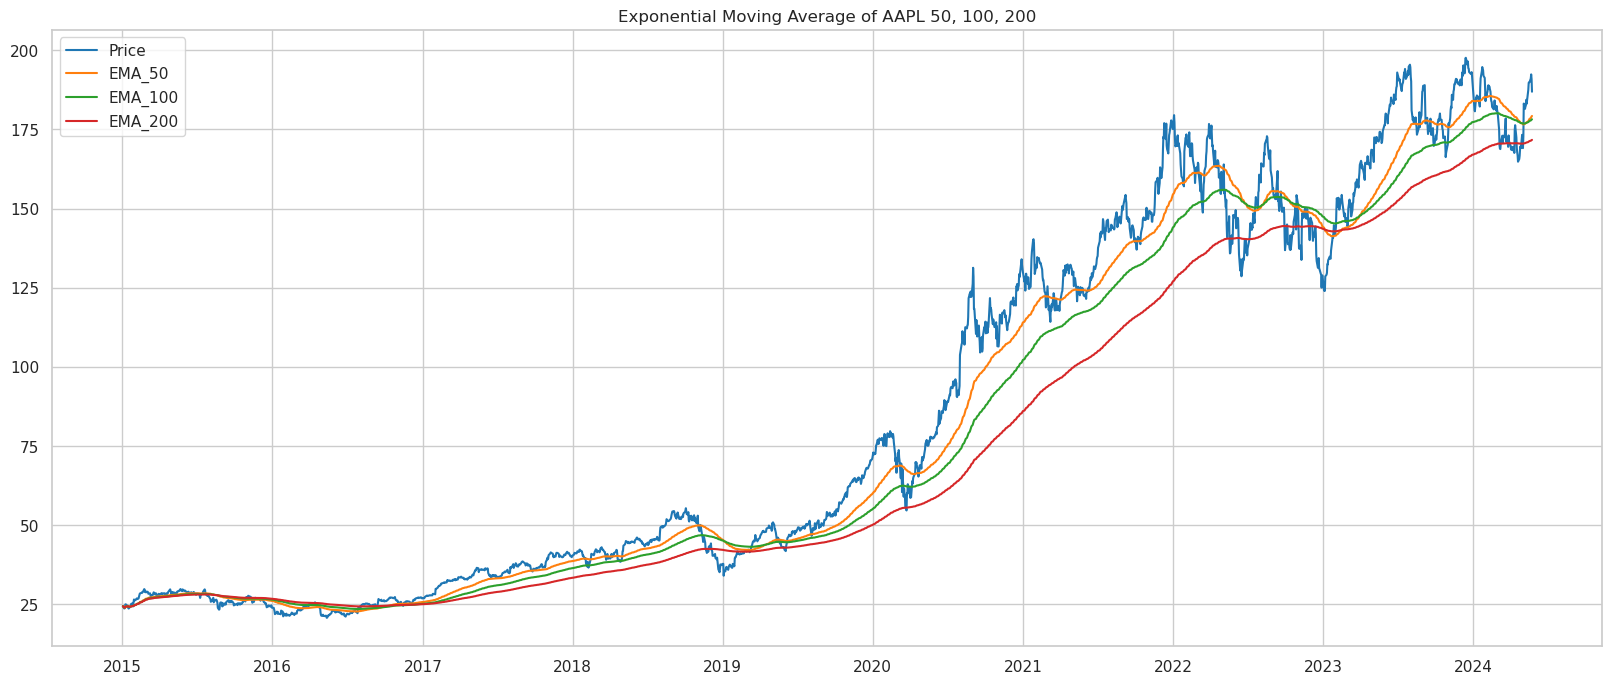

In [64]:
plot_data_EMA(exponencial)

## Usando TA-Lib

# Ta-lib es una librería que cuenta con una gran cantidad de indicadores técnicos, ya implementados y optimizados.

Para instalar la librería, ejecuta el siguiente comando en tu terminal:

`!pip install TA-Lib`

Ahora probemos que tan bueno es 😎!

### Importamos la libreria

In [65]:
import talib

2. Usaremos el ticket de META


In [66]:
ticket = 'META'
df = yf.download(ticket, start='2019-01-01')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.536194,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.600372,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.803787,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,137.903687,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.378937,26263800


2. De acuerdo a la documentación de [Ta-lib](https://ta-lib.github.io/ta-lib-python/func_groups/overlap_studies.html): Así es como se debe llamar a la función de la `EMA`

`real = EMA(close, timeperiod=30)`



In [67]:
df['EMA_10'] = talib.EMA(df['Adj Close'], timeperiod=10)
df.head()


,Open,High,Low,Close,Adj Close,Volume,EMA_10
Date,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.536194,28146200,NaN
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.600372,22717900,NaN
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.803787,29002100,NaN
2019-01-07,137.559998,138.869995,135.910004,138.050003,137.903687,20089300,NaN
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.378937,26263800,NaN


3. Creamos una funcion `plot_ema_talib` que recibirá los datos, y las EMAs, que posteriormente iterará y graficará. 

In [68]:
def plot_ema_talib(df,*windows):

    plt.plot(df['Adj Close'], label='Price')

    for window in windows:
        df[f'EMA_{window}'] = talib.EMA(df['Adj Close'],timeperiod=window)
        plt.plot(df[f'EMA_{window}' ], label=f'EMA_{window}')
    
    plt.title(f'Exponential Moving Average of {ticket} {", ".join([str(window) for window in windows])}', fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

4. LLamamos a la funcion

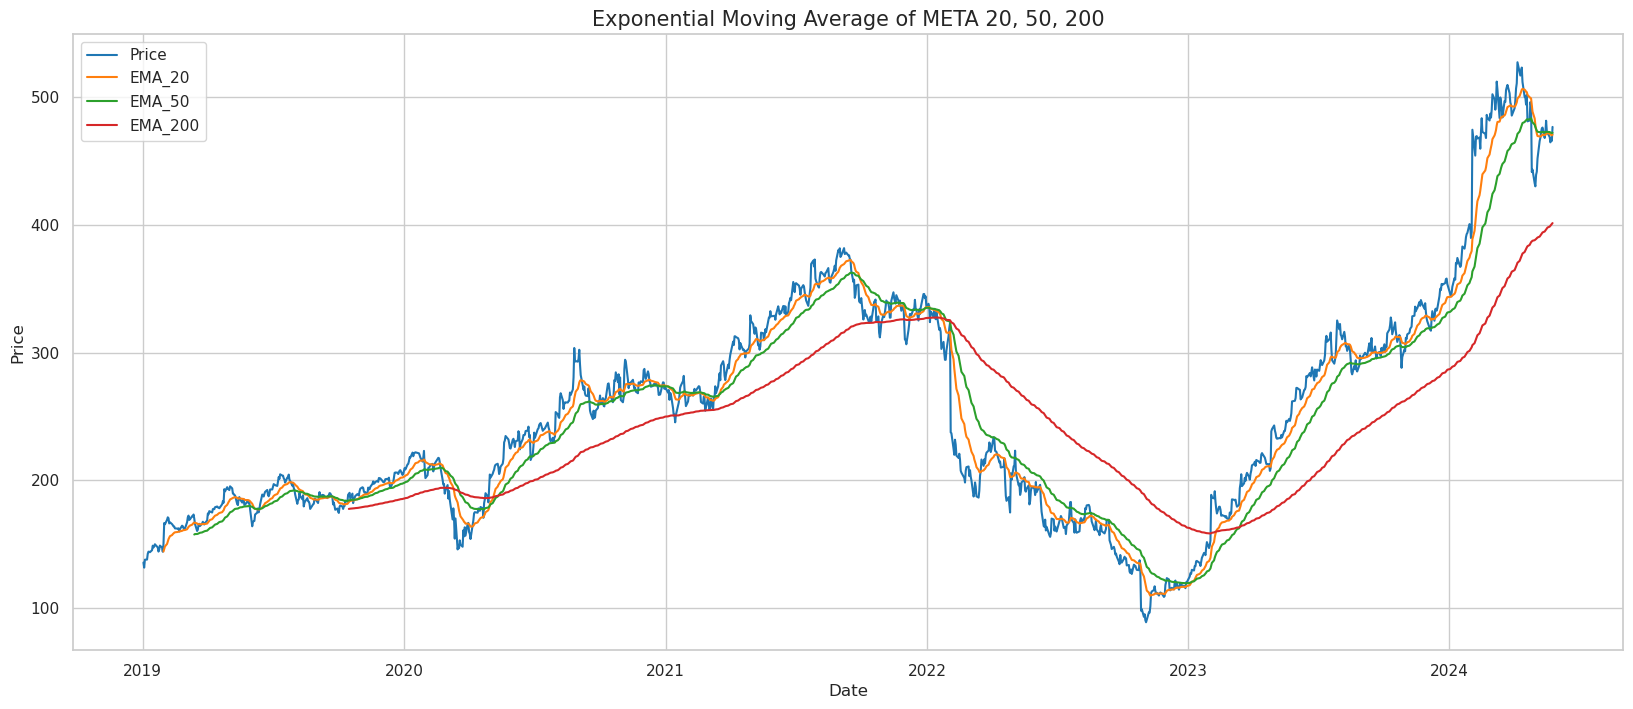

In [73]:
plot_ema_talib(df,20,50,200,)


### Conclusión: 

La SMA (Media Móvil Simple) y la EMA (Media Móvil Exponencial) son dos indicadores comunes utilizados en el trading. Entre las diversas estrategias, una de las más populares es el uso de la SMA_50 y la SMA_200. Sin embargo, es importante señalar que depender únicamente de estos indicadores no garantiza obtener grandes rendimientos. Es recomendable combinarlos con otros indicadores para realizar un análisis más completo.

<span style="color:white; background-color:red; padding:2px;"><strong>Disclaimer:</strong> Este material no constituye un consejo de inversión. Es únicamente para fines educativos.</span>



Por otro lado, la forma más sencilla de calcular las SMAs es utilizando la biblioteca TA-Lib. No obstante, para practicar y reforzar la comprensión, es beneficioso implementar estos cálculos usando Python puro con `pandas` y `numpy`.